<h3>T-розподіл</h3>

Розподіл Стьюдента по суті є сумою кількох нормально розподілених випадкових величин. Чим більше величин, тим більша ймовірність, що їхня сума матиме нормальний розподіл. Таким чином, кількість сумованих величин визначає найважливіший параметр форми даного розподілу - число ступенів свободи.

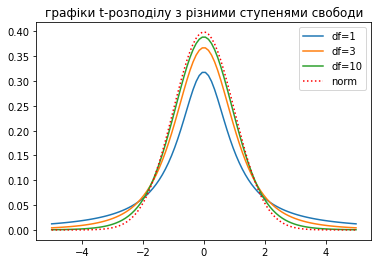

In [2]:
'''Графік знизу показує, як змінюється форма розподілу зі збільшенням кількості ступенів свободи.
А також показує наближення t-розподілу до нормального зі збільшенням ступенів свободи.'''
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графіки t-розподілу з різними ступенями свободи')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

Графік щільності розподілу Стьюдента, як і нормального розподілу, є симетричним і має вигляд дзвона, але з більш "важкими" хвостами.

<h3>Детально про нормальний та t-розподіл</h3>

У відео лекціях говорилося, що ми використовуємо t-розподіл у ситуації невеликого обсягу вибірки. Необхідно докладніше пояснити, навіщо це потрібно.

Повернемося до граничної центральної теореми, ми вже дізналися, що якщо якась ознака в генеральній сукупності розподілена нормально із середнім і стандартним відхиленням , і ми багато разів витягуватимемо вибірки однакового розміру n, і для кожної вибірки розраховуватимемо, як далеко вибіркове середнє
  X відхилилося від середнього у генеральній сукупності в одиницях стандартної помилки середнього:

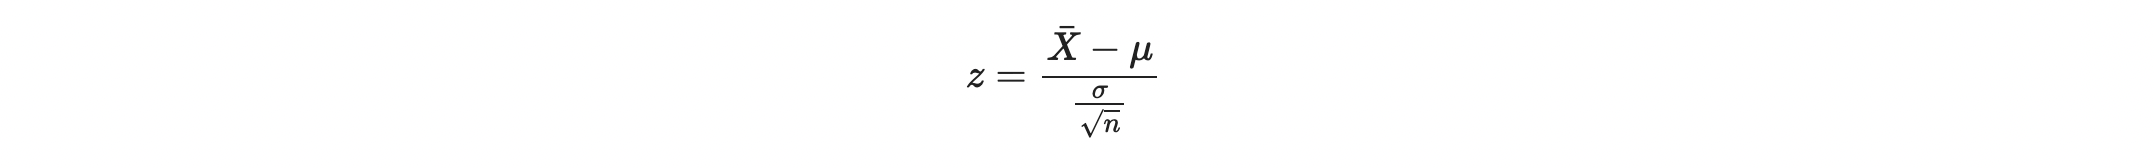

то ця величина z матиме стандартний нормальний розподіл із середнім рівним нулю і стандартним відхиленням рівним одиниці.

Зауважте, що для розрахунку стандартної помилки ми використовуємо саме стандартне відхилення в генеральній сукупності - . Раніше ми вже обговорювали, що практично нам практично ніколи не відома, і для розрахунку стандартної помилки ми використовуємо вибіркове стандартне відхилення.

Так от, строго кажучи в такому разі розподіл відхилення вибіркового середнього та середнього в генеральній сукупності, поділеного на стандартну помилку, тепер описуватиметься саме за допомогою t-розподілу.

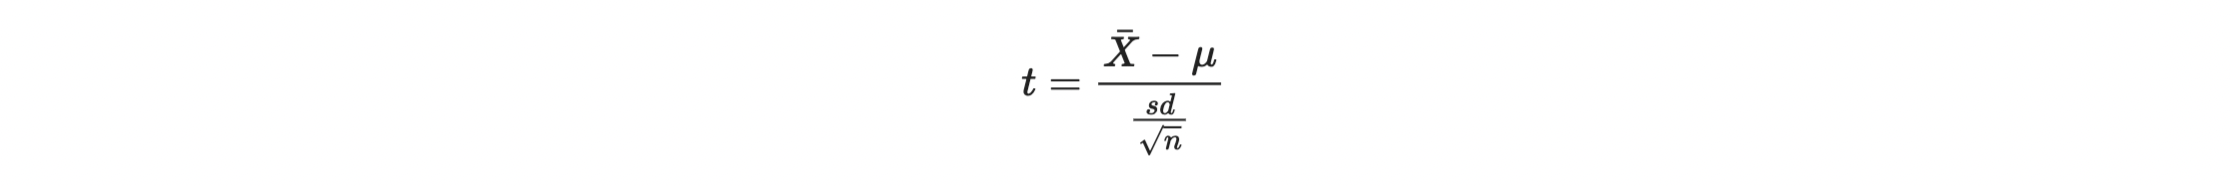

таким чином, у разі невідомої ми завжди матимемо справу з t-розподілом. На цьому етапі ви повинні з обуренням запитати мене, чому ми застосовували z-критерій у першому модулі курсу, для перевірки гіпотез, використовуючи вибіркове стандартне відхилення?

Ми вже знаємо, що при досить великому обсязі вибірки (зазвичай у підручниках наводиться правило, n > 30) t-розподіл дуже близько підбирається до нормального розподілу:

Тому іноді для простоти розрахунків говориться, що якщо n > 30, то ми будемо використовувати властивості нормального розподілу для наших цілей. Строго кажучи, це, звичайно, неправильний підхід, який часто критикують. У до комп'ютерної доби цьому було деяке пояснення, щоб не розраховувати для кожного n більше 30 відповідне критичне значення t - розподілу, статистики як би округляли результат і використовували нормальний розподіл для цих цілей. Сьогодні, звичайно, з цим більше жодних проблем немає, і всі статистичні програми, зрозуміло, легко розрахують усі необхідні показники для t - розподілу з будь-яким числом ступенів свободи. Дійсно при вибірках дуже великого обсягу t - розподіл практично не відрізнятиметься від нормального, проте, хоч і дуже малі, але відмінності все одно будуть.

Тому правильніше буде сказати, що ми використовуємо t - розподіл не тому, що у нас маленькі вибірки, а тому, що ми не знаємо стандартне відхилення в генеральній сукупності. Тому надалі ми завжди будемо використовувати t - розподіл для перевірки гіпотез, якщо нам невідоме стандартне відхилення в генеральній сукупності, необхідне розрахунку стандартної помилки, навіть якщо обсяг вибірки більше 30.

<h4>Приклад</h4>

In [4]:
'''
На вибірці в 15 спостережень за допомогою одновибіркового t-тесту перевіряється нульова гіпотеза: 
μ=10 і розраховане t-значення дорівнює -2 (t = -2), то p-рівень значущості (двосторонній) дорівнює:
'''

from scipy import stats

t = -2
n = 15
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print(f'p = {p:.3f}')

p = 0.065
